# 🧠 Synthetic Departmental Data Project
## Data Integration, Visualization, Machine Learning & Deep Learning
This project simulates employee data across 5 departments and applies ML and DL models to predict attrition.

## 🔗 Step 1: Synthetic Data Generation & Integration
In real projects, data often comes from various sources. Here we simulate data for 5 departments:
- HR (Excel)
- Finance (CSV)
- IT (SQL)
- Marketing (JSON)
- Operations (API)

We generate 1,000 records per department and merge them into a unified dataset.

In [1]:
import pandas as pd
import numpy as np

def generate_department_data(dept_name, n=1000):
    np.random.seed(hash(dept_name) % 123456)
    data = {
        "EmployeeID": np.arange(n) + hash(dept_name) % 10000,
        "Department": [dept_name]*n,
        "ExperienceYears": np.random.randint(0, 31, n),
        "Salary": np.random.randint(3000, 15000, n),
        "Age": np.random.randint(22, 60, n),
        "Gender": np.random.choice(["Male", "Female"], n),
        "EducationLevel": np.random.choice(["High School", "Bachelor", "Master", "PhD"], n, p=[0.2, 0.4, 0.3, 0.1]),
        "PerformanceScore": np.random.uniform(40, 100, n).round(2),
        "LastPromotionYears": np.random.randint(0, 11, n),
        "WorkLifeBalance": np.random.choice(["Poor", "Average", "Good", "Excellent"], n, p=[0.1, 0.4, 0.3, 0.2]),
        "Attrition": np.random.choice([0, 1], n, p=[0.8, 0.2])
    }
    return pd.DataFrame(data)

departments = ["HR", "Finance", "IT", "Marketing", "Operations"]
df = pd.concat([generate_department_data(dept) for dept in departments], ignore_index=True)
df.head()

,EmployeeID,Department,ExperienceYears,Salary,Age,Gender,EducationLevel,PerformanceScore,LastPromotionYears,WorkLifeBalance,Attrition
0,5943,HR,6,9891,38,Male,Bachelor,72.20,4,Excellent,1
1,5944,HR,21,8144,44,Male,PhD,87.62,0,Average,1
2,5945,HR,30,7629,50,Female,High School,96.46,1,Average,0
3,5946,HR,29,8203,47,Male,Master,92.42,7,Poor,0
4,5947,HR,6,10339,30,Female,High School,55.40,0,Good,0


## 📊 Step 2: Data Visualization
Visualizing data to understand distributions and relationships.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to categorical
df['Gender'] = df['Gender'].astype('category')
df['Department'] = df['Department'].astype('category')
df['EducationLevel'] = df['EducationLevel'].astype('category')
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype('category')

sns.set(style="whitegrid")


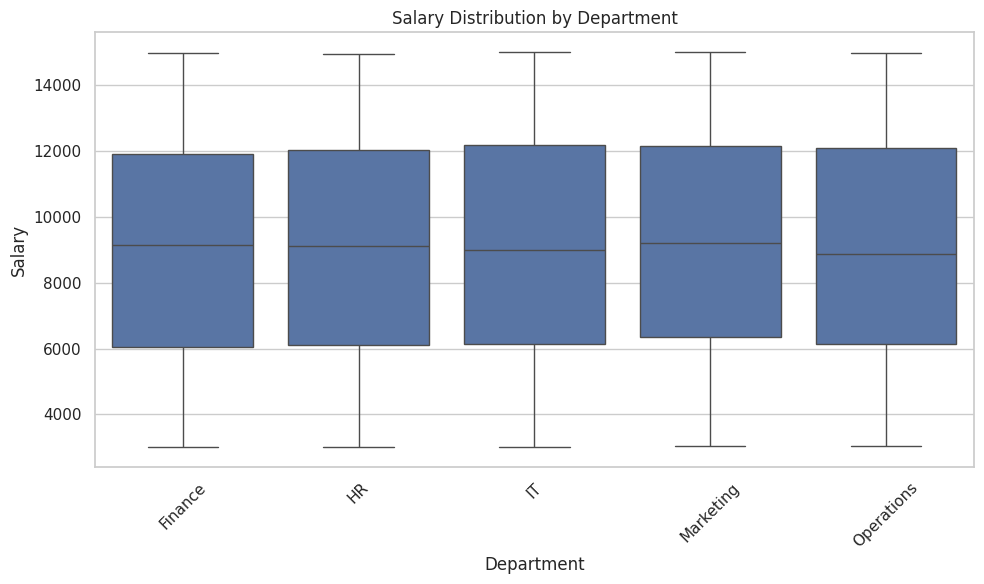

In [9]:
# Salary by department
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Salary', data=df)
plt.title('Salary Distribution by Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

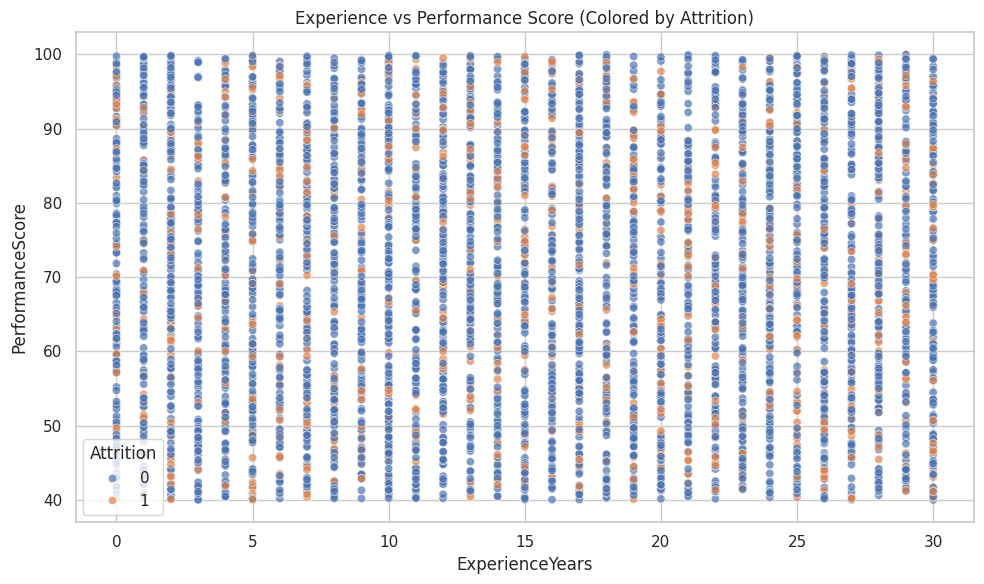

In [10]:

# Experience vs Performance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ExperienceYears', y='PerformanceScore', hue='Attrition', alpha=0.7)
plt.title('Experience vs Performance Score (Colored by Attrition)')
plt.tight_layout()
plt.show()

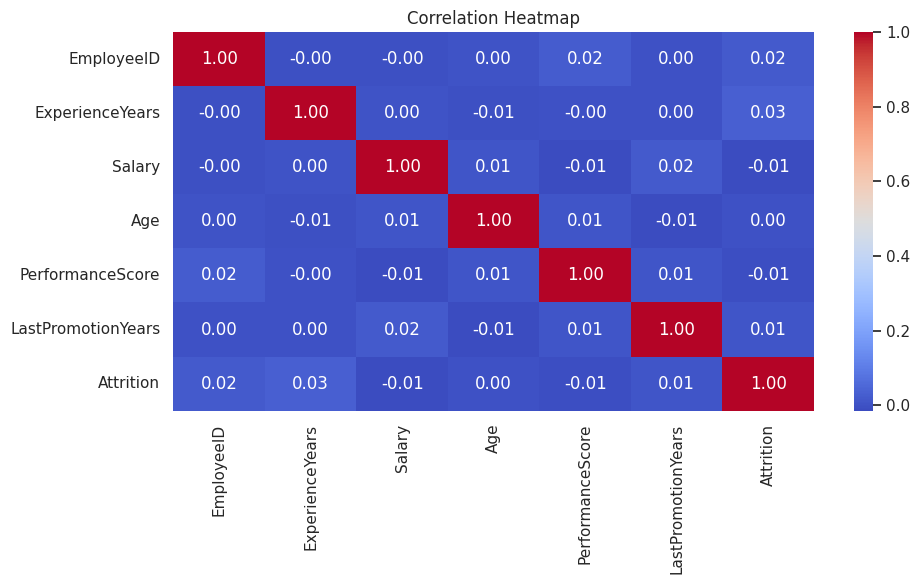

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## 🧹 Step 3: Data Preprocessing
Encode categorical features, scale numerics, and split the data.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df_encoded = df.copy()
le_gender = LabelEncoder()
df_encoded['Gender'] = le_gender.fit_transform(df_encoded['Gender'])
df_encoded = pd.get_dummies(df_encoded, columns=['Department', 'EducationLevel', 'WorkLifeBalance'], drop_first=True)
df_encoded.drop(columns=['EmployeeID'], inplace=True)

X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 🤖 Step 4: Machine Learning Model (Random Forest Classifier)

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       813
           1       0.00      0.00      0.00       187

    accuracy                           0.81      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.66      0.81      0.73      1000



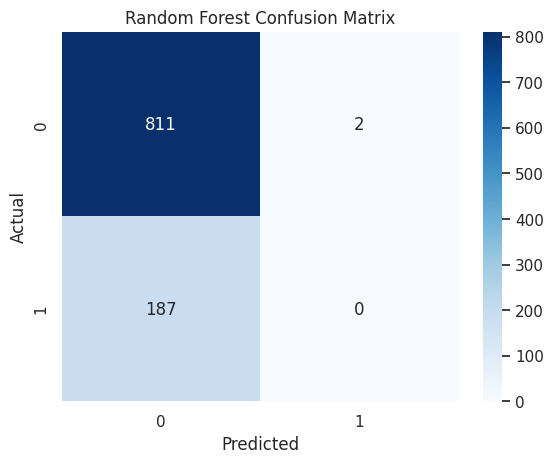

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 🧠 Step 5: Deep Learning Model (Keras)
*Note: Run this section in an environment with TensorFlow installed.*

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5942 - loss: 0.6811 - val_accuracy: 0.8130 - val_loss: 0.4933
Epoch 2/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7863 - loss: 0.5626 - val_accuracy: 0.8130 - val_loss: 0.4855
Epoch 3/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8118 - loss: 0.5139 - val_accuracy: 0.8130 - val_loss: 0.4867
Epoch 4/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8047 - loss: 0.5209 - val_accuracy: 0.8130 - val_loss: 0.4861
Epoch 5/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8027 - loss: 0.5200 - val_accuracy: 0.8130 - val_loss: 0.4875
Epoch 6/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7895 - loss: 0.5274 - val_accuracy: 0.8130 - val_loss: 0.4838
Epoch 7/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7946 - loss: 0.5222 - val_accuracy: 0.8130 - val_loss: 0.4848
Epoch 8/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8113 - loss: 0.5025 - val_accuracy: 0.

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       813
           1       0.00      0.00      0.00       187

    accuracy                           0.81      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.66      0.81      0.73      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


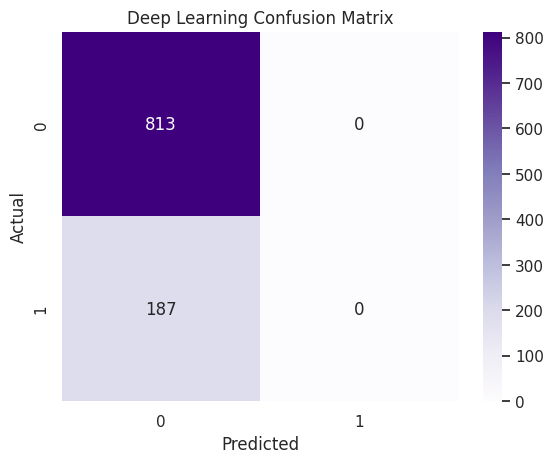

In [6]:
# Evaluate DL model
dl_preds = (model.predict(X_test) > 0.5).astype('int32')
print(classification_report(y_test, dl_preds))
sns.heatmap(confusion_matrix(y_test, dl_preds), annot=True, fmt='d', cmap='Purples')
plt.title('Deep Learning Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 📈 Step 6: Model Comparison with Visualizations

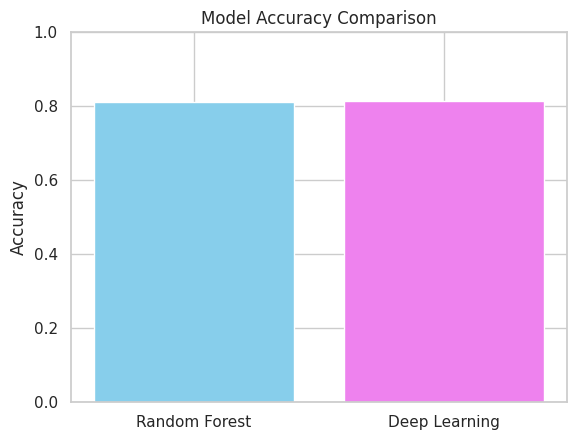

In [8]:
# Compare accuracy visually
from sklearn.metrics import accuracy_score, f1_score

rf_acc = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

dl_acc = accuracy_score(y_test, dl_preds)
dl_f1 = f1_score(y_test, dl_preds)

# Bar plot
plt.bar(['Random Forest', 'Deep Learning'], [rf_acc, dl_acc], color=['skyblue', 'violet'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()
